In [14]:
#Peptide HOMO-LUMO and energies calculation in gas-phase and then solvated
#Inspired from Iwatobipen's blogpost https://iwatobipen.wordpress.com/2018/08/24/calculate-homo-and-lumo-with-psi4-rdkit-psi4/

import psi4
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem


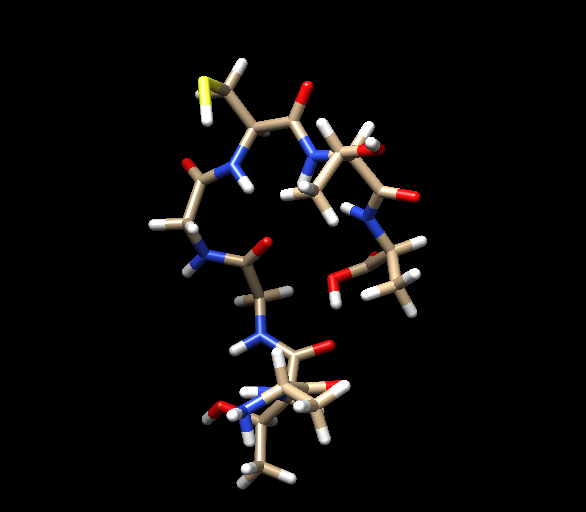

In [6]:
def mol2xyz(mol):
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, useExpTorsionAnglePrefs=True,useBasicKnowledge=True)
    AllChem.UFFOptimizeMolecule(mol)
    atoms = mol.GetAtoms()
    string = "\n"
    for i, atom in enumerate(atoms):
        pos = mol.GetConformer().GetAtomPosition(atom.GetIdx())
        string += "{} {} {} {}\n".format(atom.GetSymbol(), pos.x, pos.y, pos.z)
    string += "units angstrom\n"
    return string, mol

In [8]:
#Peptide smiles generated from sequence using Pep2SMI. 3D structure in the form of mol file of peptide generated with OpenBabel

mol=Chem.MolFromMolFile("pep.mol", removeHs=False)
xyz, mol=mol2xyz(mol)
psi4.set_memory('4 GB')
psi4.set_num_threads(4)
benz = psi4.geometry(xyz)
%time scf_e, scf_wfn = psi4.energy("B3LYP/cc-pVDZ", return_wfn=True, maxiter=5)


  Memory set to   3.725 GiB by Python driver.
  Threads set to 4 by Python driver.

Scratch directory: /tmp/

*** tstart() called on Bedabratas-MacBook-Air.local
*** at Sun Jul  3 00:47:38 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1, 7, 16, 20, 24, 31, 40                                                 entry N          line   168 file /opt/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2, 4-5, 8, 10, 13-14, 17-18, 21-22, 25, 27, 29, 32, 34, 37-38, 41, 43-44 entry C          line   138 file /opt/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 3, 9, 11, 26, 33, 35, 42, 47-76                                          entry H          line    22 file /opt/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 6, 12, 15, 19, 23, 30, 36, 39, 45-46                                     entry O          line   198 file /opt/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 28                                                             

   => Loading Basis Set <=

    Name: (CC-PVDZ AUX)
    Role: JKFIT
    Keyword: DF_BASIS_SCF
    atoms 1, 7, 16, 20, 24, 31, 40                                                 entry N          line   171 file /opt/miniconda3/share/psi4/basis/cc-pvdz-jkfit.gbs 
    atoms 2, 4-5, 8, 10, 13-14, 17-18, 21-22, 25, 27, 29, 32, 34, 37-38, 41, 43-44 entry C          line   121 file /opt/miniconda3/share/psi4/basis/cc-pvdz-jkfit.gbs 
    atoms 3, 9, 11, 26, 33, 35, 42, 47-76                                          entry H          line    51 file /opt/miniconda3/share/psi4/basis/cc-pvdz-jkfit.gbs 
    atoms 6, 12, 15, 19, 23, 30, 36, 39, 45-46                                     entry O          line   221 file /opt/miniconda3/share/psi4/basis/cc-pvdz-jkfit.gbs 
    atoms 28                                                                       entry S          line   593 file /opt/miniconda3/share/psi4/basis/cc-pvdz-jkfit.gbs 

  ==> Integral Setup <==

  ==> DiskDFJK: Density-Fitted J/K Matr

In [9]:
HOMO = scf_wfn.epsilon_a_subset('AO', 'ALL').np[scf_wfn.nalpha()]
LUMO = scf_wfn.epsilon_a_subset('AO', 'ALL').np[scf_wfn.nalpha() + 1]
print(HOMO, LUMO, scf_e)

-0.04250855796517884 -0.02719483271178493 -2356.314059771844


In [10]:
#Gas-phas PKA calculation as per https://www.intechopen.com/chapters/68591

η= LUMO-HOMO

pKa_gas = 16.3088-0.868*η

In [11]:
pKa_gas

16.295507686480054

In [ ]:
#PCMSolver will handle solvent effects on the peptide. It can be installed using conda. The input file for it requires 
#a .xyz format file from a mol file of the peptide. It can be generated using OpenBabel using obabel -imol pep,mol -oxyz -O peptidecoords.xyz. I will add a sample xyz file for this system in the github repository.

In [ ]:
# after data prep run psi4 input.dat -o output.dat from the terminal to generate solvent effect data

In [22]:
#Solvated protein generated using UCSF Chimera

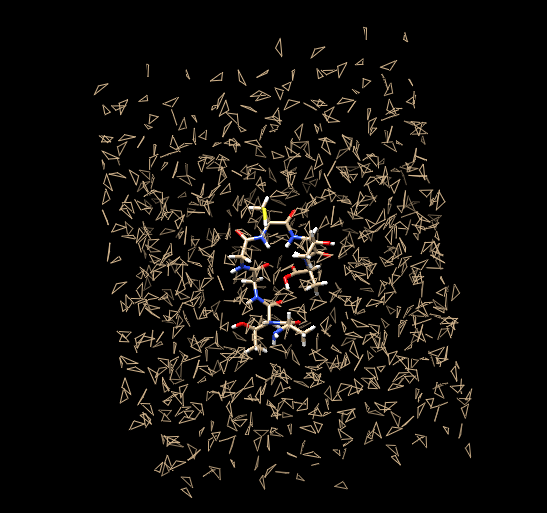